In [157]:
## This project will create linear regression models for determining the price of used cars based on their characteristics.
## Both a general model and several specific models will be created.

In [158]:
## Packages 

import numpy as np #Linear algebra
import pandas as pd #allows data manipulations and matrices
#pip install mysql-connector-python 
import mysql.connector # SQL connecter
import seaborn as sns #For visialisations
import scipy.stats as stats #Visualisations, statistics
import matplotlib.pyplot as plt #matplotlib for visualisations 
from sklearn.linear_model import LinearRegression #used to add line of best fit


In [159]:
## Using a MySQL connecter to directly query the database and pull in the data we need.
# We do have the option here to query using where statements to optimize speed but the data set is fairly small so we don't need to.


# Establish the connection
connection = mysql.connector.connect(
    host='localhost',          
    user='root',      
    password='root15',  
    database='used_car'   
)

# Create a cursor object
cursor = connection.cursor()

# SQL Query
query = "SELECT * FROM used_car.audi;"

# Execute the query
cursor.execute(query)

# Fetch all rows from the executed query
result = cursor.fetchall()

# Get column names
column_names = [i[0] for i in cursor.description]

# Create a DataFrame
audi = pd.DataFrame(result, columns=column_names)

# Close the cursor and connection
cursor.close()




True

In [160]:
# Repeating for all data we want to collect

# Create a cursor object
cursor = connection.cursor()

# SQL query
query = "SELECT * FROM used_car.bmw;"

# Execute the query
cursor.execute(query)

# Fetch all rows from the executed query
result = cursor.fetchall()

# Get column names
column_names = [i[0] for i in cursor.description]

# Create a DataFrame
bmw = pd.DataFrame(result, columns=column_names)

# Close the cursor and connection
cursor.close()




True

In [161]:

# Create a cursor object
cursor = connection.cursor()

# Query
query = "SELECT * FROM used_car.ford;"

# Execute the query
cursor.execute(query)

# Fetch all rows from the executed query
result = cursor.fetchall()

# Get column names
column_names = [i[0] for i in cursor.description]

# Create a DataFrame
ford = pd.DataFrame(result, columns=column_names)



In [162]:
# Create a cursor object
cursor = connection.cursor()

# Query
query = "SELECT * FROM used_car.hyundi;"

# Execute the query
cursor.execute(query)

# Fetch all rows from the executed query
result = cursor.fetchall()

# Get column names
column_names = [i[0] for i in cursor.description]

# Create a DataFrame
hyundi = pd.DataFrame(result, columns=column_names)



In [163]:
# Create a cursor object
cursor = connection.cursor()

# Query
query = "SELECT * FROM used_car.merc;"

# Execute the query
cursor.execute(query)

# Fetch all rows from the executed query
result = cursor.fetchall()

# Get column names
column_names = [i[0] for i in cursor.description]

# Create a DataFrame
merc = pd.DataFrame(result, columns=column_names)


In [164]:
# Create a cursor object
cursor = connection.cursor()

# Query
query = "SELECT * FROM used_car.skoda;"

# Execute the query
cursor.execute(query)

# Fetch all rows from the executed query
result = cursor.fetchall()

# Get column names
column_names = [i[0] for i in cursor.description]

# Create a DataFrame
skoda = pd.DataFrame(result, columns=column_names)


In [165]:

# Create a cursor object
cursor = connection.cursor()

# Query
query = "SELECT * FROM used_car.all_used;"

# Execute the query
cursor.execute(query)

# Fetch all rows from the executed query
result = cursor.fetchall()

# Get column names
column_names = [i[0] for i in cursor.description]

# Create a DataFrame
all_used = pd.DataFrame(result, columns=column_names)


In [166]:
print(all_used)


          model  year  price transmission  mileage fuelType  tax   mpg  \
0            A1  2017  12500       Manual    15735   Petrol  150  55.4   
1            A6  2016  16500    Automatic    36203   Diesel   20  64.2   
2            A1  2016  11000       Manual    29946   Petrol   30  55.4   
3            A4  2017  16800    Automatic    25952   Diesel  145  67.3   
4            A3  2019  17300       Manual     1998   Petrol  145  49.6   
...         ...   ...    ...          ...      ...      ...  ...   ...   
62855      Yeti  2014  11440    Semi-Auto    14569   Petrol  160  44.8   
62856   Octavia  2014  10990    Semi-Auto    49999   Petrol   30  56.5   
62857     Fabia  2017   9500    Semi-Auto    17131   Petrol  145  61.4   
62858    Citigo  2016   5999       Manual    21747   Petrol   20  62.8   
62859     Fabia  2017   9232    Semi-Auto    42530   Petrol   20  60.1   

       engineSize   make  
0             1.4   audi  
1             2.0   audi  
2             1.4   audi  
3  

In [167]:
# Function to list all data frames
def list_dataframes():
    return [var_name for var_name, var_value in globals().items() if isinstance(var_value, pd.DataFrame)]

# List all DataFrames in the current namespace
dataframes = list_dataframes()
print("Available DataFrames:", dataframes)

Available DataFrames: ['audi', 'bmw', 'ford', 'hyundi', 'merc', 'skoda', 'all_used', 'X', 'vif_data', 'df_ff']


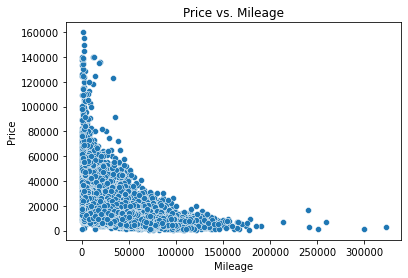

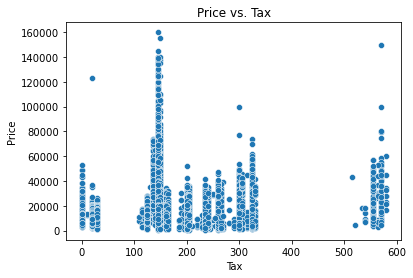

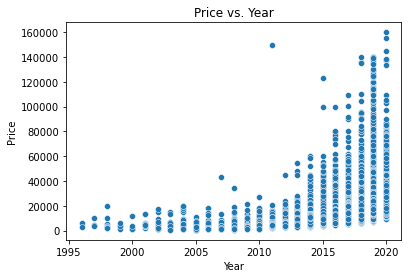

In [168]:
## Visualizing data

# Looking for variables that have linear relationships with price.
# Pairplot to see relationships.
# Scatter plot of price vs. mileage
sns.scatterplot(data=all_used, x='mileage', y='price')
plt.title('Price vs. Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

# Scatter plot of price vs. tax
sns.scatterplot(data=all_used, x='tax', y='price')
plt.title('Price vs. Tax')
plt.xlabel('Tax')
plt.ylabel('Price')
plt.show()

# Scatter plot of price vs. year
sns.scatterplot(data=all_used, x='year', y='price')
plt.title('Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

## Notes: 
# None of these are linear so we will have to use transformations to create the linear relationship we are looking for.
# Tax isn't linear nor can it be 'saved' by transformations. Thus we will not include it in any models. 

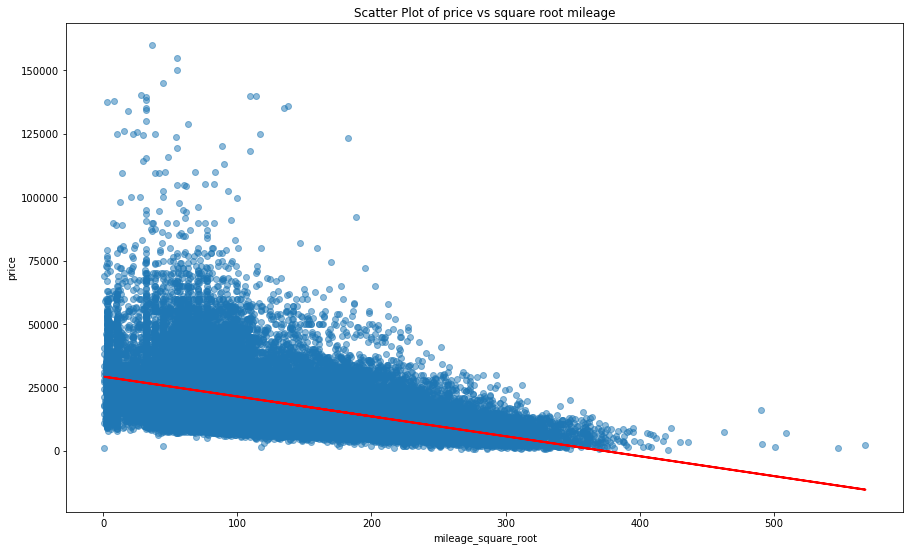

In [169]:
##Transforming variables
# This will add an column containing the square root of mileage
all_used['mileage_square_root'] = np.sqrt(all_used['mileage'])
#Scatterplot of price vs. mileage_square_root
plt.figure(figsize=(15, 9))
plt.scatter(all_used['mileage_square_root'], all_used['price'], alpha=0.5)
plt.xlabel('mileage_square_root')
plt.ylabel('price')
plt.title('Scatter Plot of price vs square root mileage')

# Fit linear regression model
X = all_used['mileage_square_root'].values.reshape(-1, 1)
y = all_used['price'].values
model = LinearRegression().fit(X, y)
line = model.predict(X)

# Plot the line of best fit
plt.plot(all_used['mileage_square_root'], line, color='red', linewidth=2, label='Line of Best Fit')

plt.show()

## This looks linear enough and we can use statistical tests to confirm this. 
## Also, this data contains 60 000+ entries so the outliers with abnormally high price and mileage don't stop this relationship from being linear.

sns.histplot(all_used['price'], bins=10, kde=False)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [170]:
## Creating a new variable called age to calculate the age of a car
# Calculate the maximum year
max_year = all_used['year'].max()

# Calculate the relative age of each car, add 1 to make log transforms work.
all_used['age'] = ((max_year - all_used['year'])+1)

min((all_used['age']))


1

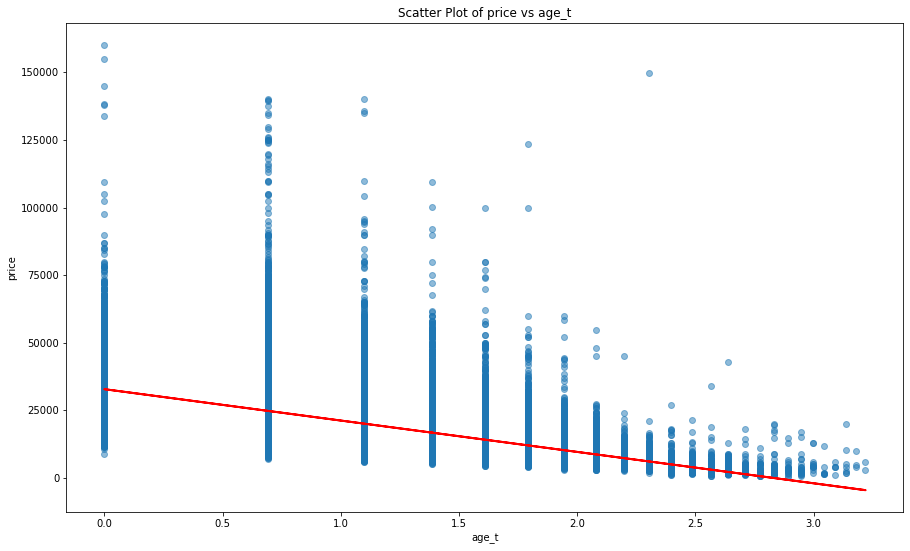

In [171]:
##Transforming variables

# Various transformations to try
all_used['age_t'] = np.log(all_used['age'])
all_used['age_t2'] = np.exp(all_used['age'])
all_used['age_t3'] = np.power(all_used['age'],2)
all_used['age_t4'] = np.power(all_used['age'],3)
all_used['age_t5'] = np.power(all_used['age'],1/2)
all_used['age_t6'] = np.power(all_used['age'],1/4)



#Scatterplot of price vs. mileage
plt.figure(figsize=(15, 9))
plt.scatter(all_used['age_t'], all_used['price'], alpha=0.5)
plt.xlabel('age_t')
plt.ylabel('price')
plt.title('Scatter Plot of price vs age_t')

# Fit linear regression model
X = all_used['age_t'].values.reshape(-1, 1)
y = all_used['price'].values
model = LinearRegression().fit(X, y)
line = model.predict(X)

# Plot the line of best fit
plt.plot(all_used['age_t'], line, color='red', linewidth=2, label='Line of Best Fit')

plt.show()

In [172]:
## Lets scale mileage so that a unit is equal to 1000 miles
all_used['thousand_miles'] = all_used['mileage']/1000
print(all_used['thousand_miles'])

0        15.735
1        36.203
2        29.946
3        25.952
4         1.998
          ...  
62855    14.569
62856    49.999
62857    17.131
62858    21.747
62859    42.530
Name: thousand_miles, Length: 62860, dtype: float64


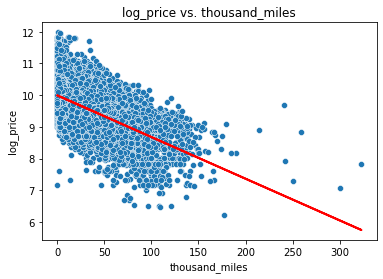

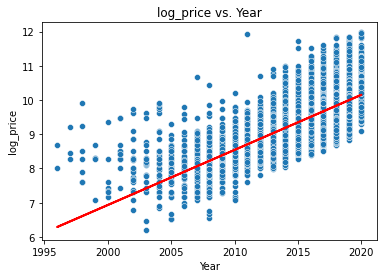

In [173]:
##Alternatively we can transform our dependent variable to try create a linear relationship.
#This transforms the dependent variable price by log 
all_used['log_price'] = np.log(all_used['price'])

# Scatter plot of price vs. mileage
sns.scatterplot(data=all_used, x='thousand_miles', y='log_price')
plt.title('log_price vs. thousand_miles')
plt.xlabel('thousand_miles')
plt.ylabel('log_price')

# Fit linear regression model
X = all_used['thousand_miles'].values.reshape(-1, 1)
y = all_used['log_price'].values
model = LinearRegression().fit(X, y)
line = model.predict(X)

# Plot the line of best fit
plt.plot(all_used['thousand_miles'], line, color='red', linewidth=2, label='Line of Best Fit')

plt.show()


# Scatter plot of price vs. year
sns.scatterplot(data=all_used, x='year', y='log_price')
plt.title('log_price vs. Year')
plt.xlabel('Year')
plt.ylabel('log_price')

# Fit linear regression model
X = all_used['year'].values.reshape(-1, 1)
y = all_used['log_price'].values
model = LinearRegression().fit(X, y)
line = model.predict(X)

# Plot the line of best fit
plt.plot(all_used['year'], line, color='red', linewidth=2, label='Line of Best Fit')

plt.show()

## This creates a more linear fit than the previous transformations, however, this will change the interpretation of the model. 
## Furthermore, when making prediction we have to make sure to back transform.

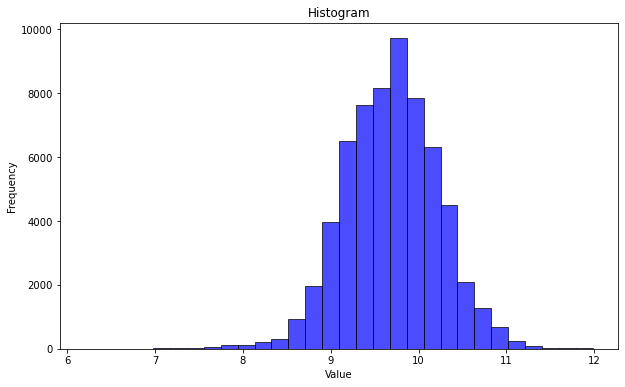

In [174]:
## Here I'm going to check if the log of price is distributed normally.
## It's not a requirement but often if the dependent variable is normally distributed so will the error terms.
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(all_used['log_price'], bins=30, alpha=0.7, color='blue', edgecolor='black')

# Add titles and labels
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show plot
plt.show()

## Slight left skew but looks normally distributed

In [175]:
## T-test for linearity between the variables.

from scipy.stats import pearsonr

# Pearson Correlation Coefficient
correlation, p_value = pearsonr(all_used['year'], all_used['log_price'])
print(f'Pearson Correlation Coefficient: {correlation}')
print(f'P-value: {p_value}')
# Pearson Correlation Coefficient
correlation, p_value = pearsonr(all_used['thousand_miles'], all_used['log_price'])
print(f'Pearson Correlation Coefficient: {correlation}')
print(f'P-value: {p_value}')

##The null hypothesis (H0:) is no linear relationship.
## Here we reject the null at the 5% confidence interval.
## This result shows us there is a  sufficient linear relationship between these variables.

Pearson Correlation Coefficient: 0.6371810949760583
P-value: 0.0
Pearson Correlation Coefficient: -0.5288028303214058
P-value: 0.0


In [176]:
## Creating our initial general model for predicting car prices based on the mileage and year.
## The goal is to create a accurate general model that will work on all cars. 

# Import the ols function
from  statsmodels.formula.api  import ols
# Create the model object
car_price = ols('log_price ~ year + thousand_miles', data=all_used)
# Fit the model
car_price = car_price.fit()

# Print the parameters of the fitted model
print(car_price.params)

Intercept        -270.247168
year                0.138815
thousand_miles     -0.002937
dtype: float64


In [177]:
# Reports summary information of the model so we can diagnose whether the model is accurate and/or fitting.
print(car_price.summary())
# Findings:
#-The model is significant and so are its chosen explanatory variables. 
#- Low but reasonable R^2 value indicates explanatory variables chosen somewhat explain variation in log_price
# Durbin-Watson test suggests negative autocorrelation 
# The Note at the bottom of the summary is suggesting multicolinearity or another numerical problem 

## Assumptions required for BLUE (best linear unbiased estimators ) under Gauss-Markov theorem
## 1. Linearity
## 2. no multicolinearity
## 3. Homoscedasticity 
## 4. Error terms follow normal distribution

## Next we will look through the diagnostics to make sure the model is BLUE and the results are accurate.


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                 2.203e+04
Date:                Thu, 13 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:26:50   Log-Likelihood:                -33238.
No. Observations:               62860   AIC:                         6.648e+04
Df Residuals:                   62857   BIC:                         6.651e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -270.2472      2.355   -114.

In [178]:
## Lets address multicolinearity by calculating VIF (variance inflation factor)
import statsmodels.api as sm #Stats models 
from statsmodels.stats.outliers_influence import variance_inflation_factor # Used to calculate VIF
X = all_used[["year","thousand_miles",]]
X = sm.add_constant(X)
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# Calculate VIF
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# Convert VIF to normal number format by rounding
vif_data["VIF"] = vif_data["VIF"].round(2)
print(vif_data)
## We can ignore the constant term.
## Looking for VIF values below 5 (lower the better) to deduce there is no multicolinearity.
## The result here suggests that the data doesn't have any multicolinearity 

          feature         VIF
0           const  2067262.97
1            year        2.27
2  thousand_miles        2.27


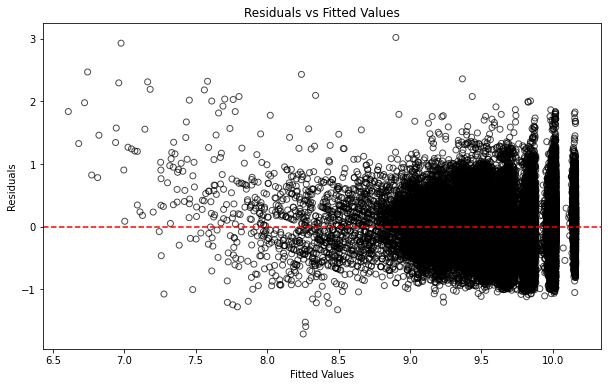

In [179]:
##Lets look at the distribution of residuals and figure out if we have heteroskedasticity

fitted_vals = car_price.fittedvalues
residuals = car_price.resid

# Ploting residuals vs fitted values
plt.figure(figsize=(10, 6))
plt.scatter(fitted_vals, residuals, edgecolor='k', facecolor='none', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

In [180]:
## Testing for heteroskadicity 

from statsmodels.stats.diagnostic import het_breuschpagan

# Perform Breusch-Pagan test
test_statistic, p_value, _, _ = het_breuschpagan(residuals, car_price.model.exog)

print(f'Breusch-Pagan test statistic: {test_statistic}')
print(f'p-value: {p_value:.6f}')

## H0: Homoscedasticity 
## H1: Heteroscedasticity 
## We reject the null hypothesis and conclude our residuals do not have constant variance and thus violates the assumptions for BLUE ols estimators.
## Moreover, The OLS estimators are no longer efficient. This means they do not have the minimum variance among the class of linear unbiased estimators. The standard errors of the estimated coefficients are incorrect, which affects hypothesis tests and confidence intervals.

Breusch-Pagan test statistic: 1124.4727983295293
p-value: 0.000000


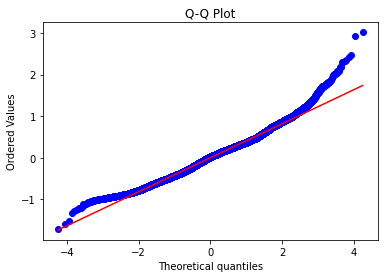

In [181]:
## Q-Q plot to check for normality in residuals.

import scipy.stats as stats 

# Create the Q-Q plot
fig, ax = plt.subplots()
stats.probplot(residuals, dist="norm", plot=ax)
ax.set_title("Q-Q Plot")
plt.show()

## looks fairly normal. 

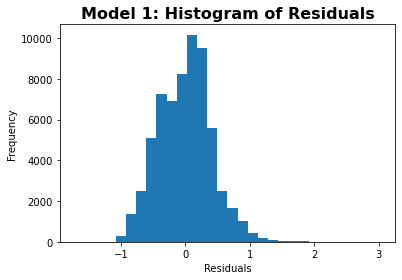

In [182]:
# Check normality of residuals
plt.hist(residuals, bins=30)  # Adjust the number of bins as needed
plt.title('Model 1: Histogram of Residuals', fontsize=16, weight='bold')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Doesn't look normally distributed

In [183]:
## Statistically testing if the residuals are normally distributed 

from scipy.stats import anderson

# Assuming 'residuals' is an array of your residuals
anderson_result = anderson(residuals, dist='norm')
print(f'Anderson-Darling test statistic: {anderson_result.statistic}')
for i in range(len(anderson_result.critical_values)):
    sl, cv = anderson_result.significance_level[i], anderson_result.critical_values[i]
    print(f'Significance level {sl}: Critical value {cv}')


from scipy.stats import kstest, norm

# Assuming 'residuals' is an array of your residuals
ks_stat, ks_p_value = kstest(residuals, 'norm', args=(residuals.mean(), residuals.std()))
print(f'Kolmogorov-Smirnov test statistic: {ks_stat}')
print(f'p-value: {ks_p_value:.6f}')


#Here both tests lead to rejecting the null for normally distributed residuals.

Anderson-Darling test statistic: 85.80969225507579
Significance level 15.0: Critical value 0.576
Significance level 10.0: Critical value 0.656
Significance level 5.0: Critical value 0.787
Significance level 2.5: Critical value 0.918
Significance level 1.0: Critical value 1.092
Kolmogorov-Smirnov test statistic: 0.02493170163223568
p-value: 0.000000


This concludes our general model and we have been unable to create a valid and useful model based on the data. We can trust that the models coefficients are unbiased so the impact of mileage and year would be correct however without normally distributed residuals, the t-tests and hypothesis test may not be accurate and could be incorrect. This leads us to rejecting our model. Moreover, the low R^2 value indicates that our variables alone do not do a sufficient job at explaining the variation in price. This is because the make and model of a car will have a large impact in the price and the ols model is unable to capture and explain this relationship. As a result, this model will not be useful to anyone or any company for predicting prices of cars or in the use of detecting low priced cars.

Now we will look at creating a linear regression model based on a specific make and model of a car and try again to create a useful and accurate model.

In [184]:
## We are going to create a model just for ford fiestas, I've chosen this make and model because it has the most entries

# Create dataframe from ford table
df_ff = pd.DataFrame(ford)
# Filter on fiesta model
df_ff = df_ff[df_ff['model'] == ' Fiesta']
# Count entries
total_entries = len(df_ff)
print(f'Total number of entries: {total_entries}')

Total number of entries: 6508


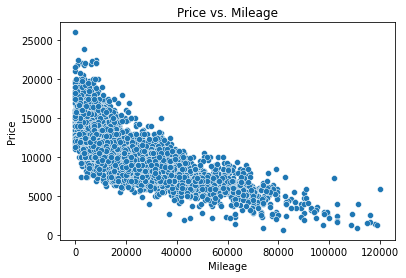

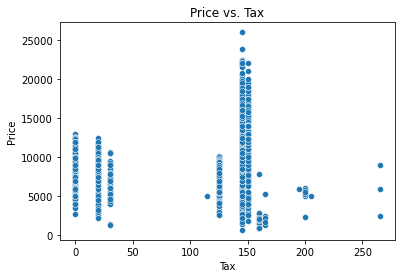

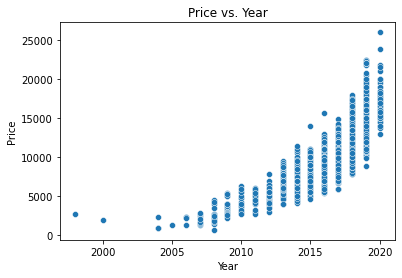

In [185]:
## Once again we should visualize our data and look for linear relationships. 
## Visualizing data

# Looking for variables that have linear relationships with price.
# Pairplot to see relationships.
# Scatter plot of price vs. mileage
sns.scatterplot(data=df_ff, x='mileage', y='price')
plt.title('Price vs. Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

# Scatter plot of price vs. tax
sns.scatterplot(data=df_ff, x='tax', y='price')
plt.title('Price vs. Tax')
plt.xlabel('Tax')
plt.ylabel('Price')
plt.show()

# Scatter plot of price vs. year
sns.scatterplot(data=df_ff, x='year', y='price')
plt.title('Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

## Notes: 
# We can see a linear relationship between price and mileage and almost linear relationship for year. 
# We can remove the entries before 2006 to remove outliers and create a linear relationship. 

In [186]:
#Filter out entries before 2006

df_ff = df_ff[df_ff['year'] >= 2006]
# Count entries
total_entries = len(df_ff)
print(f'Total number of entries: {total_entries}')
# We removed 6 entries.

Total number of entries: 6502


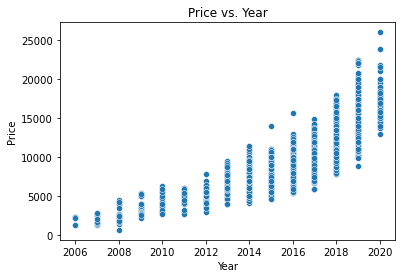

In [187]:
# Scatter plot of price vs. year
sns.scatterplot(data=df_ff, x='year', y='price')
plt.title('Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

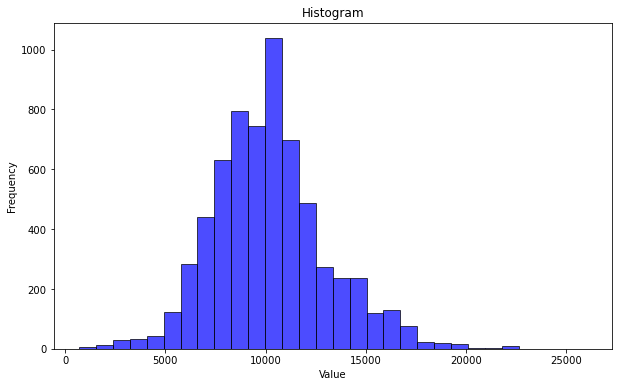

In [188]:
## Checking normality of price 
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_ff['price'], bins=30, alpha=0.7, color='blue', edgecolor='black')

# Add titles and labels
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show plot
plt.show()

# Doesn't look perfectly normally distributed but it doesn't have to be, the residuals have to be. However, usually a normally distributed dependent variable will coincide with normally distributed errors.

In [189]:
# Create the model object
car_price_ford = ols('price ~ year + mileage', data=df_ff)
# Fit the model
car_price_ford = car_price_ford.fit()

# Print the parameters of the fitted model
print(car_price_ford.params)

# Reports summary information of the model so we can diagnose whether the model is accurate and/or fitting.
print(car_price_ford.summary())

Intercept   -1.821970e+06
year         9.089734e+02
mileage     -4.886552e-02
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     6977.
Date:                Thu, 13 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:26:54   Log-Likelihood:                -57288.
No. Observations:                6502   AIC:                         1.146e+05
Df Residuals:                    6499   BIC:                         1.146e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [190]:
## Lets address multicolinearity by calculating VIF (variance inflation factor)
X = df_ff[["year","mileage",]]
X = sm.add_constant(X)
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# Calculate VIF
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# Convert VIF to normal number format by rounding
vif_data["VIF"] = vif_data["VIF"].round(2)
print(vif_data)
## We can ignore the constant term.
## Looking for VIF values below 5 (lower the better) to deduce there is no multicolinearity.
## The result here suggests that the data doesn't have any multicolinearity 

   feature         VIF
0    const  2148728.17
1     year        1.97
2  mileage        1.97


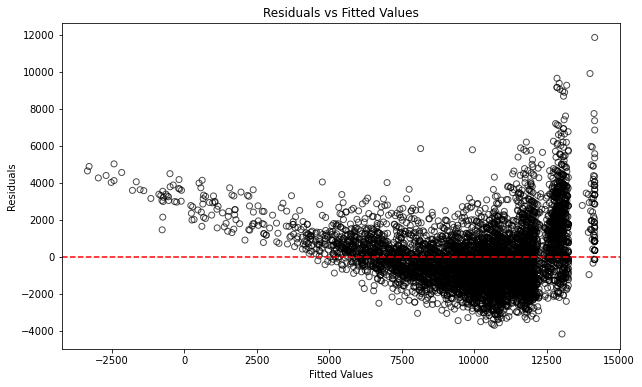

In [191]:
##Lets look at the distribution of residuals and figure out if we have heteroskedasticity

fitted_vals_ford = car_price_ford.fittedvalues
residuals_ford = car_price_ford.resid

# Ploting residuals vs fitted values
plt.figure(figsize=(10, 6))
plt.scatter(fitted_vals_ford, residuals_ford, edgecolor='k', facecolor='none', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

## Doesn't look to be homoskedastic 

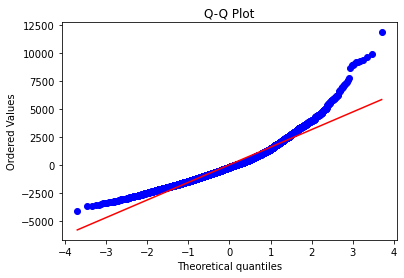

In [192]:
## Lets check normality of residuals.

## Q-Q plot to check for normality in residuals.

import scipy.stats as stats 

# Create the Q-Q plot
fig, ax = plt.subplots()
stats.probplot(residuals_ford, dist="norm", plot=ax)
ax.set_title("Q-Q Plot")
plt.show()

# Doesn't look normally distributed.



In [193]:
## Statistical tests for normality
## The null hypothesis is the errors are normally distributed and our alternate hypothesis is they ARE NOT normally distributed.  

anderson_result = anderson(residuals_ford, dist='norm')
print(f'Anderson-Darling test statistic: {anderson_result.statistic}')
for i in range(len(anderson_result.critical_values)):
    sl, cv = anderson_result.significance_level[i], anderson_result.critical_values[i]
    print(f'Significance level {sl}: Critical value {cv}')



# Assuming 'residuals' is an array of your residuals
ks_stat, ks_p_value = kstest(residuals_ford, 'norm', args=(residuals.mean(), residuals.std()))
print(f'Kolmogorov-Smirnov test statistic: {ks_stat}')
print(f'p-value: {ks_p_value:.6f}')


# Interpretation
if anderson_result.statistic > anderson_result.critical_values[2] or ks_p_value < 0.05:
    print("The residuals are not normally distributed.")
else:
    print("The residuals are normally distributed.")

# These results show that the errors are not normally distributed


Anderson-Darling test statistic: 79.36185415595719
Significance level 15.0: Critical value 0.576
Significance level 10.0: Critical value 0.656
Significance level 5.0: Critical value 0.787
Significance level 2.5: Critical value 0.917
Significance level 1.0: Critical value 1.091
Kolmogorov-Smirnov test statistic: 0.5662851517935318
p-value: 0.000000
The residuals are not normally distributed.


In [194]:
## Firstly we will take the log of price to try fix this issue

#Creating log_price
df_ff['log_price'] = np.log(df_ff['price'])

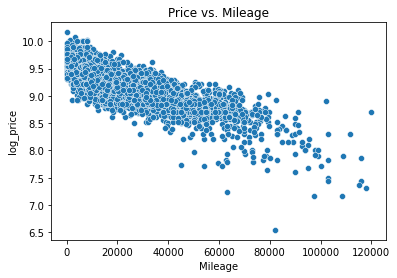

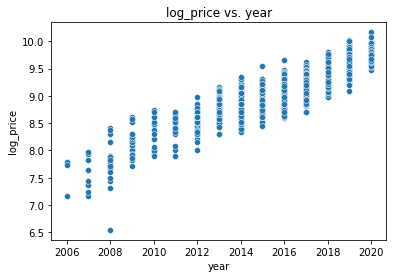

In [195]:
# Scatter plot of log_price vs. mileage
sns.scatterplot(data=df_ff, x='mileage', y='log_price')
plt.title('Price vs. Mileage')
plt.xlabel('Mileage')
plt.ylabel('log_price')
plt.show()

# Scatter plot of log_price vs. year
sns.scatterplot(data=df_ff, x='year', y='log_price')
plt.title('log_price vs. year')
plt.xlabel('year')
plt.ylabel('log_price')
plt.show()

# These plots look almost linear but they have a few problems:
# mileage seems to brake down after 100 000 miles 
# Price has an outlier in 2008
# We will remove these to improve the model

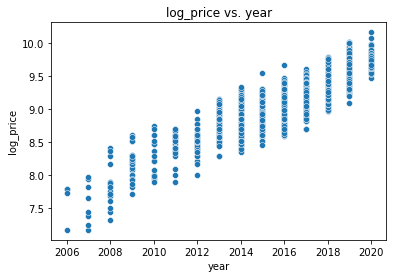

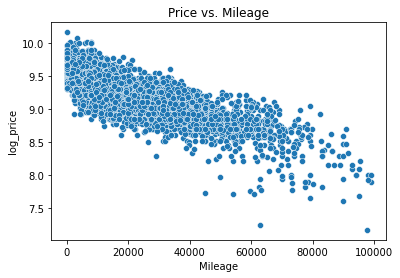

In [196]:

# Filter the DataFrame to remove log_price <= 7
df_ff = df_ff[df_ff['log_price'] > 7]

# Scatter plot of log_price vs. year
sns.scatterplot(data=df_ff, x='year', y='log_price')
plt.title('log_price vs. year')
plt.xlabel('year')
plt.ylabel('log_price')
plt.show()

# Filter the DataFrame to remove mileage >= 100 000
df_ff = df_ff[ df_ff['mileage'] < 100000 ]

# Scatter plot of log_price vs. mileage
sns.scatterplot(data=df_ff, x='mileage', y='log_price')
plt.title('Price vs. Mileage')
plt.xlabel('Mileage')
plt.ylabel('log_price')
plt.show()

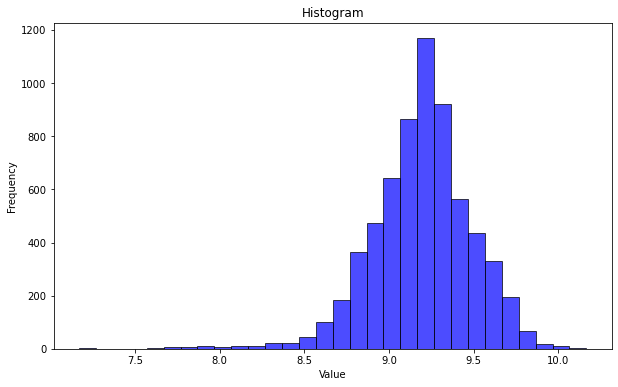

In [197]:
## Checking normality of price 
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_ff['log_price'], bins=30, alpha=0.7, color='blue', edgecolor='black')

# Add titles and labels
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show plot
plt.show()

## This plot looks far more normally distributed however it does have left skew.

In [198]:
## Creating a new ols model
# Create the model object
car_price_ford2 = ols('log_price ~ year + mileage', data=df_ff)
# Fit the model
car_price_ford2 = car_price_ford2.fit()

# Print the parameters of the fitted model
print(car_price_ford2.params)

# Reports summary information of the model so we can diagnose whether the model is accurate and/or fitting.
print(car_price_ford2.summary())

Intercept   -193.786670
year           0.100703
mileage       -0.000006
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                 1.261e+04
Date:                Thu, 13 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:26:56   Log-Likelihood:                 3899.0
No. Observations:                6487   AIC:                            -7792.
Df Residuals:                    6484   BIC:                            -7772.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

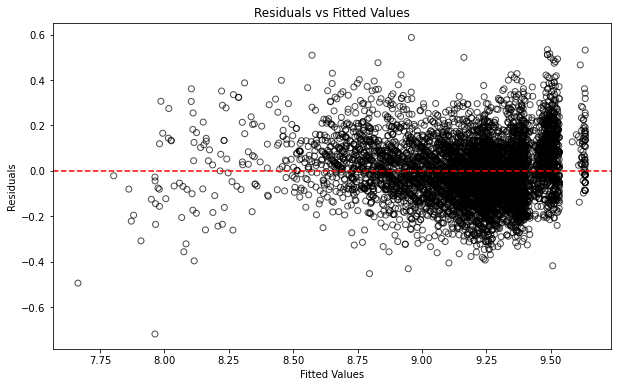

In [199]:
##Lets look at the distribution of residuals and figure out if we have heteroskedasticity

fitted_vals_ford2 = car_price_ford2.fittedvalues
residuals_ford2 = car_price_ford2.resid

# Ploting residuals vs fitted values
plt.figure(figsize=(10, 6))
plt.scatter(fitted_vals_ford2, residuals_ford2, edgecolor='k', facecolor='none', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

## looks like the errors are heteroskadastic 

In [200]:
##White test (statistical test ) for heterosckedasticity

from statsmodels.stats.diagnostic import het_white

# Define the independent variables and the dependent variable
X = df_ff[['year', 'mileage']]
X = sm.add_constant(X)
y = df_ff['log_price']

# Fit the model
model = sm.OLS(y, X).fit()

# Perform White's test
white_test = het_white(model.resid, X)

# Extract the test results
lm_stat, lm_pvalue, f_stat, f_pvalue = white_test

print(f'White\'s test LM statistic: {lm_stat}')
print(f'p-value of LM statistic: {lm_pvalue}')
print(f'White\'s test F statistic: {f_stat}')
print(f'p-value of F statistic: {f_pvalue}')

## Results here indicate heterskedasticity 

White's test LM statistic: 169.5244262275143
p-value of LM statistic: 1.3229229491209872e-35
White's test F statistic: 43.4848270474025
p-value of F statistic: 4.575165205437193e-36


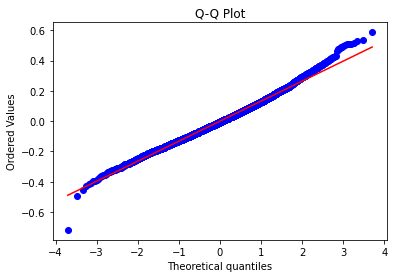

In [201]:
## Lets check normality of residuals.

## Q-Q plot to check for normality in residuals. 

# Create the Q-Q plot
fig, ax = plt.subplots()
stats.probplot(residuals_ford2, dist="norm", plot=ax)
ax.set_title("Q-Q Plot")
plt.show()

# Does look normally distributed.

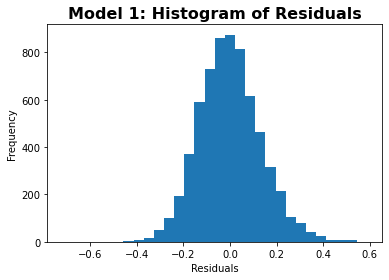

In [202]:
# Check normality of residuals
plt.hist(residuals_ford2, bins=30)  # Adjust the number of bins as needed
plt.title('Model 1: Histogram of Residuals', fontsize=16, weight='bold')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Does look normally distributed

In [203]:
## Statistical tests for normality
## The null hypothesis is the errors are normally distributed and our alternate hypothesis is they ARE NOT normally distributed.  

anderson_result = anderson(residuals_ford2, dist='norm')
print(f'Anderson-Darling test statistic: {anderson_result.statistic}')
for i in range(len(anderson_result.critical_values)):
    sl, cv = anderson_result.significance_level[i], anderson_result.critical_values[i]
    print(f'Significance level {sl}: Critical value {cv}')



# Assuming 'residuals' is an array of your residuals
ks_stat, ks_p_value = kstest(residuals_ford2, 'norm', args=(residuals.mean(), residuals.std()))
print(f'Kolmogorov-Smirnov test statistic: {ks_stat}')
print(f'p-value: {ks_p_value:.6f}')


# Interpretation
if anderson_result.statistic > anderson_result.critical_values[2] or ks_p_value < 0.05:
    print("The residuals are not normally distributed.")
else:
    print("The residuals are normally distributed.")

# These results show that the errors are not normally distributed



Anderson-Darling test statistic: 7.141088339827547
Significance level 15.0: Critical value 0.576
Significance level 10.0: Critical value 0.656
Significance level 5.0: Critical value 0.787
Significance level 2.5: Critical value 0.917
Significance level 1.0: Critical value 1.091
Kolmogorov-Smirnov test statistic: 0.26199541315467
p-value: 0.000000
The residuals are not normally distributed.


In [204]:
## All condition for a BLUE OLS model are met except for homoskedasticity despite transformations so we will create a new model using robust standard errors to account for this 

# Define the independent variables and the dependent variable
X = df_ff[['year', 'mileage']]
X = sm.add_constant(X)
y = df_ff['log_price']

# Fit the model with OLS
model = sm.OLS(y, X).fit()

# Get robust standard errors
robust_model = model.get_robustcov_results()

# Summary of the model with robust standard errors
print(robust_model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     8544.
Date:                Thu, 13 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:26:56   Log-Likelihood:                 3899.0
No. Observations:                6487   AIC:                            -7792.
Df Residuals:                    6484   BIC:                            -7772.
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -193.7867      2.608    -74.292      0.0

In [217]:
## Calulates the % change based on the coefficient output 
#year
print((np.exp( 0.1007)-1)*100)
#mileage
print((np.exp( -5.736e-06  )-1)*100)

10.59448085483654
-0.0005735983549137735


This is our final model which is BLUE (best linear unbiased estimators) and we can use this to interpret our coefficients and make predictions.
NOTE: All the finding below only apply to Ford Fiestas 
Findings: 
* R^2 is 0.795 which is very good and shows us our model can predict changes in the log of price very well based on the dependent variables. IE approximately 80% of variation in log of price can be explained by the variables year and mileage. This indicates that for Ford Fiestas, these two factors are extremely important in determining the price of the car. This can likely be generalized for most cars of specific make and model.
* Every additional year a car has (keeping other variables constant) will increase price by approximately 10.6%
* Every addition mile of mileage (keeping other variables constant) will decrease the price by 0.00057%. IE 1000 miles would decrease the price of a Ford Fiesta by 0.57%

Limitations:
This model is only specified for used cars and only for Ford Fiestas specifically. This means that new cars with the current year and no mileage can not be estimated using this model and also other brands of cars likewise can not be analyzed/predicted. This specific model is more useful as a proof of concept and a larger system with OLS regressions for every make and model of a car can be produced to accurately predict the rough price of cars and a program to do such could be produced. 